## თამთა თოფურია
mail: ttopu18@freeuni.edu.ge

---

# გულის დაავადების ამოცნობა ლოჯისტიკური რეგრესიით

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [105]:
import os
path = os.getcwd() + '/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(path, header=0)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [106]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


---

გამოვყოთ გარდაცვლილი პაციენტების dataset: death_event_data

In [107]:
death_event_data = data[data['DEATH_EVENT'] == 1]
alive_data = data[data['DEATH_EVENT'] == 0]
death_event_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417,1.0
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946,62.378281,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,1.0
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000,25.500000,1.0
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000,44.500000,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000,102.250000,1.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.0


---

შევხედოთ მონაცემების ვიზუალიზაციას: death rate

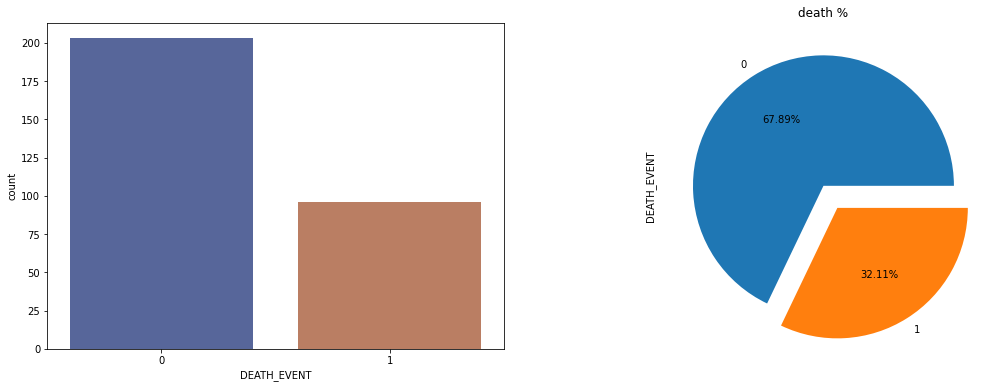

In [108]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(data=data, x='DEATH_EVENT', ax=ax[0], palette="dark", alpha=0.7)

death_count = data['DEATH_EVENT'].value_counts(normalize=True)
death_count.plot.pie(autopct="%.2f%%",explode = [0,0.2],ax=ax[1])
plt.title('death %')
plt.show()

---

ნომინალური ცვლადების ვიზუალიზაცია: anaemia, diabetes, high_blood_pressure, sex, smoking

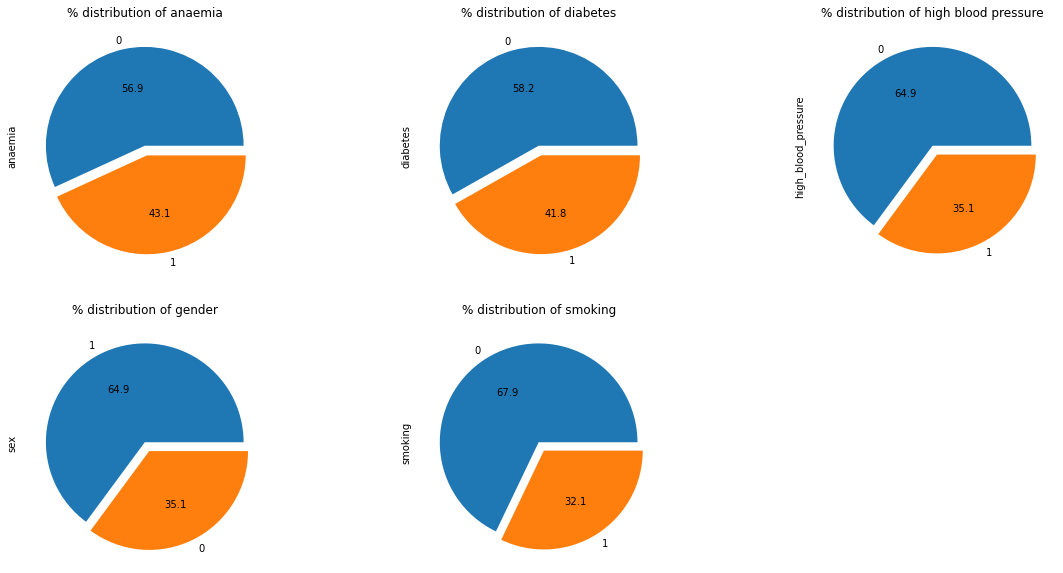

In [109]:
plt.figure(1)
plt.subplot(231)
data['anaemia'].value_counts().plot.pie(title='% distribution of anaemia',figsize=(20,10),autopct="%1.1f",explode=[0,.1])

plt.subplot(232)
data['diabetes'].value_counts().plot.pie(title='% distribution of diabetes',autopct="%1.1f",explode=[0,.1])

plt.subplot(233)
data['high_blood_pressure'].value_counts().plot.pie(title='% distribution of high blood pressure',autopct="%1.1f",explode=[0,.1])

plt.subplot(234)
data['sex'].value_counts().plot.pie(title='% distribution of gender',autopct="%1.1f",explode=[0,.1])

plt.subplot(235)
data['smoking'].value_counts().plot.pie(title='% distribution of smoking',autopct="%1.1f",explode=[0,.1])
plt.show()

ვხედავთ, რომ ჩვენი dataset-დან ადამიანების უმეტესობას არ ჰქონდა `ანემია` ან `დიაბეტი` ან `მაღალი წნევა` ან იყვნენ `არამწეველი` ან `მამაკაცი`.

---

ნომინალური ცვლადების ვიზუალიზაცია death_event_data-ში: anaemia, diabetes, high_blood_pressure, sex, smoking

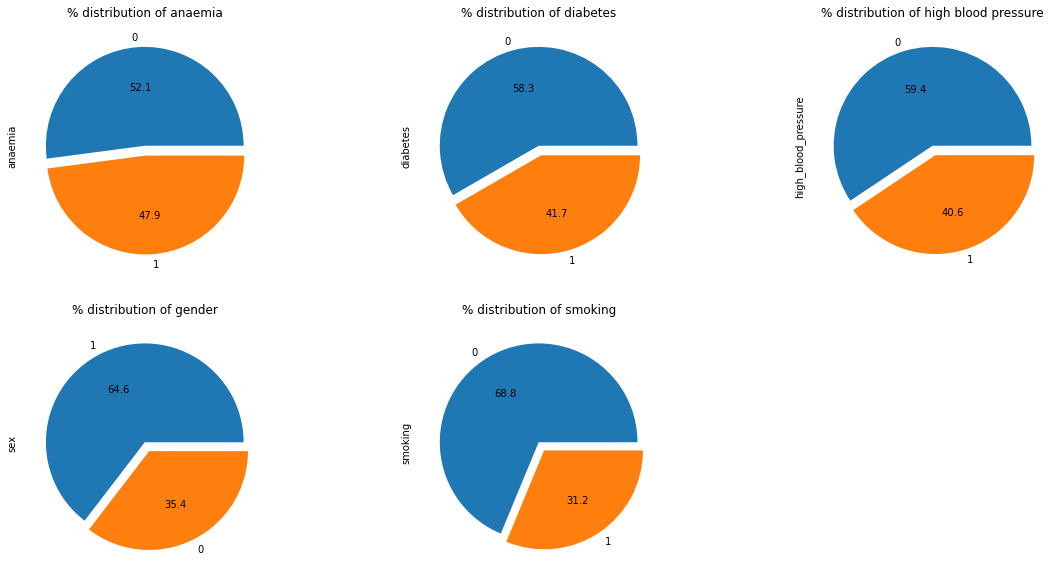

In [110]:
plt.figure(1)
plt.subplot(231)
death_event_data['anaemia'].value_counts().plot.pie(title='% distribution of anaemia',figsize=(20,10),autopct="%1.1f",explode=[0,.1])

plt.subplot(232)
death_event_data['diabetes'].value_counts().plot.pie(title='% distribution of diabetes',autopct="%1.1f",explode=[0,.1])

plt.subplot(233)
death_event_data['high_blood_pressure'].value_counts().plot.pie(title='% distribution of high blood pressure',autopct="%1.1f",explode=[0,.1])

plt.subplot(234)
death_event_data['sex'].value_counts().plot.pie(title='% distribution of gender',autopct="%1.1f",explode=[0,.1])

plt.subplot(235)
death_event_data['smoking'].value_counts().plot.pie(title='% distribution of smoking',autopct="%1.1f",explode=[0,.1])
plt.show()

__რა დამოკიდებულებაა მოცემულ ცვლადებსა და სიკვდილს შორის:__

როგორც ვხედავთ, მნიშვნელოვანი დამოკიდბულება არ გააჩნია არცერთ ცვლადს სიკვდილთან გარდა ანემიისა მაღალი წნევისა.

ანემიიანი და მაღალწნევიანი ადამიანი უფრო მეტალბათურად მოკვდება.

---

__ორდინალური ცვლადების სიკვდილიანობასთან დამოკიდებულების ვიზუალიზაცია:__ age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time

<AxesSubplot:xlabel='time', ylabel='Count'>

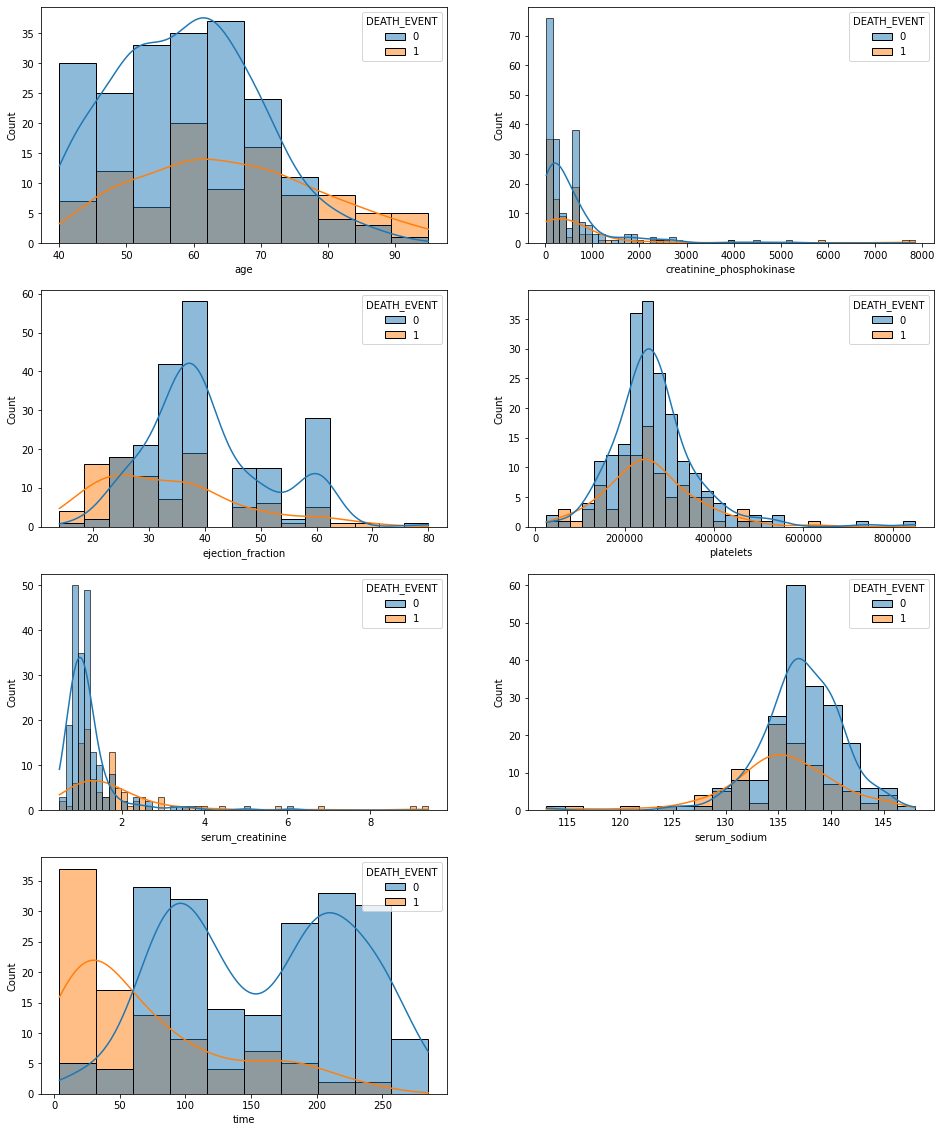

In [111]:
plt.figure(1,figsize=(16,20))
plt.subplot(4,2,1)
sns.histplot(data=data,x='age', hue="DEATH_EVENT", kde=True)

plt.figure(1,figsize=(16,20))
plt.subplot(4,2,2)
sns.histplot(data=data,x='creatinine_phosphokinase', hue="DEATH_EVENT", kde=True)

plt.figure(1,figsize=(16,8))
plt.subplot(4,2,3)
sns.histplot(data=data,x='ejection_fraction', hue="DEATH_EVENT", kde=True)

plt.figure(1,figsize=(16,8))
plt.subplot(4,2,4)
sns.histplot(data=data,x='platelets', hue="DEATH_EVENT", kde=True)

plt.figure(1,figsize=(16,8))
plt.subplot(4,2,5)
sns.histplot(data=data,x='serum_creatinine', hue="DEATH_EVENT", kde=True)

plt.figure(1,figsize=(16,8))
plt.subplot(4,2,6)
sns.histplot(data=data,x='serum_sodium', hue="DEATH_EVENT", kde=True)

plt.figure(1,figsize=(16,8))
plt.subplot(4,2,7)
sns.histplot(data=data,x='time', hue="DEATH_EVENT", kde=True)


მოცემული გრაფები გარკვეულწილად გვაძლევენ დამოკიდებულებას DEATH_EVENT-სა და feature-ებს შორის:

disclaimer: თუმცა გასათვალიწინებელია ის ფაქტი, რომ ცოცხალსა და გარდაცვლილ მონაცემებს შორის შეფარდება 2:1 არის, ანუ DEATH_EVENT=0 2-ჯერ უფრო მაღლა უნდა იყოს DEATH_EVENT=1 გრაფზე თუ არანაირი მკვეთრი დამოკიდებულება არაა მოცემულ ცვლადსა და სიკვდილ-სიცოცხლეს შორის.

1. რაც უფრო ხანდაზმულია პაციენტი, მით უფრო მეტალბათურია მისი სიკვდილი (რადგან კუდში სტაფილოსფერი გრაფი უფრო ზევითაა ვიდრე ცისფერი)
2. creatinine_phosphokinase მკვეთრ კორელაციაში არაა სიკვდილთან.
3. რაც უფრო ნაკლები რაოდენობის ejection_fraction აქვს ადამიანს, მით უფრო მეტალბათურია მისი სიკვდილი.
4. platelets მკვეთრ კორელაციაში არაა სიკვდილთან.
5. რაც უფრო მეტია serum_creatinine, მით უფრო მეტალბათურია ადამიანის სიკვდილი.
6. რაც უფრო ნაკლებია serum_sodium, მით უფრო მეტალბათურია ადამიანის სიკვდილი.
7. ძალიან მკვეთრი დამოკიდებულებაა time-სა და სიკვდილიანობას შორის, რაც ეჭვს იწვევს ჩვენში.

__რატომ უნდა ამოვიღოთ time ცვლადი:__

დავაკვირდეთ time ცვლადს, ის გულისხმობს თუ რამდენი დროა გასული პაციენტის მოსვლიდან გაწერამდე ან სიკვდილამდე. თუ ადამიანი კვდება time ძალიან პატარაა, თუ ადამიანი არ კვდება გვაქვს 2 პიკი: 100 დღეზე და 220 დღეზე დაახლოებით. ეს ნიშნავს, რომ ორ პერიოდში ხდება გაწერამდე გადამოწმება ადამიანის ჯანმრთელობის. მოცემული ცვლადი არის მომავლის ცვლადი, როდესაც თავიდან მოდის პაციენტი შეგვიძლია დავადგინოთ ყველა ცვლადის მნიშვნლეობა გარდა time-სა, შესაბამისად მისი არსებობა უკვე როცა ვიცით სიკვდილიანობის შედეგი კარგია, მაგრამ როცა ახლა ვადგენთ საერთოდ არ გვეხმარება.

__skewness-ის გამოსასწორებლად__:

დავამატოთ შემდეგი ცვლადები:
1. sqrt(creatinine_phosphokinase)
2. sqrt(serum_creatinine) - ამისი კორელაცია ყველაზე მეტად გაიზრდება, დანარჩენების ალბათ იგივე დარჩება, რადგან დიდად გავლენას არც ახდენდნენ სიკვდილზე
3. sqrt(platelets)
4. serum_sodium**2

---

__შევამციროთ skewness:__

before skewness of creatinine_phosphokinase :  4.463110084653752
after skewness of creatinine_phosphokinase :  2.1073272967562025
before skewness of serum_creatinine :  4.455995882049026
after skewness of serum_creatinine :  2.821051683421487
before skewness of platelets :  1.4623208382757793
after skewness of platelets :  0.17868001456234672
before skewness of serum_sodium :  -1.0481360160574988
after skewness of serum_sodium :  -0.8111746793951639


<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

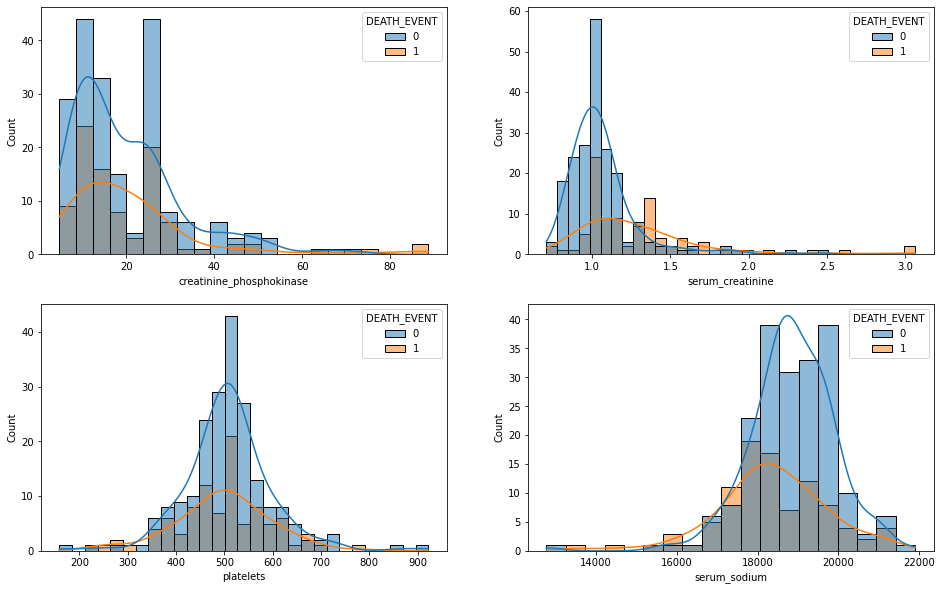

In [112]:
plt.figure(1,figsize=(16,10))
#after
plt.subplot(2,2,1)
col_name = 'creatinine_phosphokinase'
print('before skewness of', col_name, ': ', data[col_name].skew())
data[col_name] = np.sqrt(data[col_name])
print('after skewness of', col_name, ': ', data[col_name].skew())
sns.histplot(data=data,x=col_name, hue="DEATH_EVENT", kde=True)

#after
plt.subplot(2,2,2)
col_name = 'serum_creatinine'
print('before skewness of', col_name, ': ', data[col_name].skew())
data[col_name] = np.sqrt(data[col_name])
print('after skewness of', col_name, ': ', data[col_name].skew())
sns.histplot(data=data,x=col_name, hue="DEATH_EVENT", kde=True)

#after
plt.subplot(2,2,3)
col_name = 'platelets'
print('before skewness of', col_name, ': ', data[col_name].skew())
data[col_name] = np.sqrt(data[col_name])
print('after skewness of', col_name, ': ', data[col_name].skew())
sns.histplot(data=data,x=col_name, hue="DEATH_EVENT", kde=True)

#after
plt.subplot(2,2,4)
col_name = 'serum_sodium'
print('before skewness of', col_name, ': ', data[col_name].skew())
data[col_name] = data[col_name]**2
print('after skewness of', col_name, ': ', data[col_name].skew())
sns.histplot(data=data,x=col_name, hue="DEATH_EVENT", kde=True)

---

### შევხედოთ ყველა ცვლადს შორის კორელაციას:

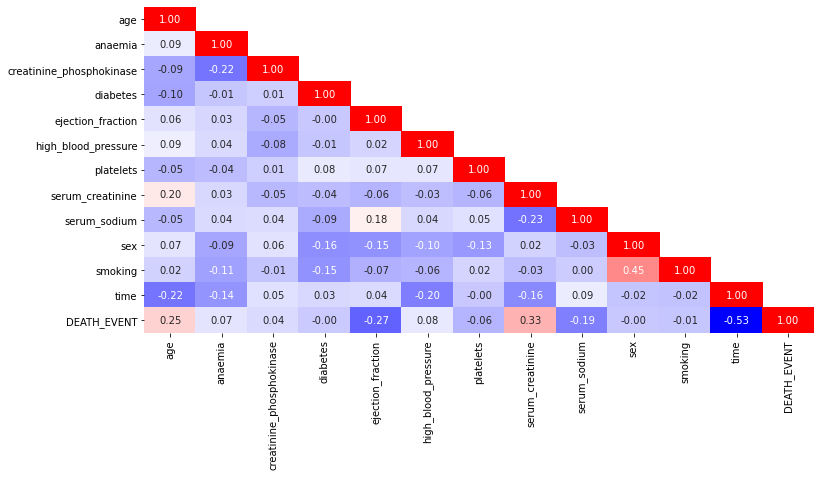

In [113]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(12, 6))
with sns.axes_style("white"):
    sns.heatmap(matrix,mask=np.triu(matrix,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="bwr");

სიკვდილიანობა არის ყველაზე მეტად დამოკიდებული time-ზე, თუმცა ამ ცვლადს ამოვიღებთ.

ასევე სქესი და მწეველობა (კაცები უფრო ეწევიან, ვიდრე ქალები) - დიდს არაფერს გვაძლევს

მკვეთრი დამოკიდებულებები: 
1. seru_creatinine და სიკვდილი
2. ejection_fraction და სიკვდილი
3. ასაკი და სიკვდილი
4. time და ასაკი - რაც უფრო დიდია პაციენტი, მით უფრო მეტალბათურია სიკვდილი -- ამასაც არ აქვს აზრი, time-ს ვიღებთ
5. serum_creatinine და ასაკი
6. serum_creatinine და serum_sodium (უკუკორელაცია) ეს ნიშნავს, რომ ოდნავ ერთნაირი ცვლადებია, ერთი რომ არ მქონოდა მეორე მაინც მომცემდა მაგაზე ინფოს.

---

## ჯერ ავაგოთ მოდელი საწყისი 12 ცვლადით 

დავარანდომოთ მონაცემების მიმდევრობა (ყოველ ჯერზე ახალი train, dev, test სეტისთვის) 

disclaimer: ეს prepare-სგან გამოვყავი, რადგან შევადაროთ ერთსა და იმავე დატასეტზე სხვადსხვა მოდელების პირობაში როგორი შედეგი გვაქვს

In [114]:
#data = data.sample(frac=1)

შევქმნათ prepare ფუნქცია:

* შევქმნათ feature-ების მატრიცა X, ასევე ნამდვილი პასუხების ვექტორი y.
* დავყოთ მონაცემები სამ dataset-ად: training (60%), development(20%), test(20%).
* დავანორმალიზოთ train ის საშუალო და სტანდარტული გადახრის მიხედვით.
* ჩავამატოთ 1-იანების სვეტი (bias)

In [115]:
def prepare(data):
    X = data.loc[:, data.columns != 'DEATH_EVENT']
    y = data.loc[:, data.columns == 'DEATH_EVENT']
    
    X = np.array(X)
    y = np.array(y)
    
    nTrain = 3*len(X)//5
    nDev = len(X)//5
    #training
    Xtrain = X[0 : nTrain, :]
    ytrain = y[0 : nTrain, :]
    #develoment
    Xdev = X[nTrain : nTrain + nDev, :]
    ydev = y[nTrain : nTrain + nDev, :]
    #test
    Xtest = X[nTrain + nDev : , :]
    ytest = y[nTrain + nDev : , :]
    
    #normalize
    mean = Xtrain.mean(axis = 0, keepdims=True)
    std = Xtrain.std(axis = 0, keepdims=True)
    Xtrain = (Xtrain - mean) / std
    Xdev = (Xdev - mean) / std
    Xtest = (Xtest - mean) /std
    
    #ones
    Xtrain = np.append(np.ones([len(Xtrain), 1]), Xtrain, axis=1)
    Xdev = np.append(np.ones([len(Xdev), 1]), Xdev, axis=1)
    Xtest = np.append(np.ones([len(Xtest), 1]), Xtest, axis=1)
    return (Xtrain, ytrain, Xdev, ydev, Xtest, ytest)

აღვწეროთ sigmoid ფუნქცია, რომელიც cost-ში და გრადიენტში გამოგვადგება

In [116]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Cost ფუნქცია, რომელიც ასევე მოიცავს რეგულარიზაციას

In [117]:
def computeCost(theta, X, y, lambdaPar):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    h = sigmoid(X @ theta.T)
    first = np.multiply(-y, np.log(h+1e-8))
    second = np.multiply(1-y, np.log(1 - h+1e-8))
    #regularization
    reg = (lambdaPar / (2 * len(X))) * np.sum(np.power(theta[:, 1:], 2))
    return np.sum(first - second)/len(X) + reg

ითვლის cost-ის გრადიენტს და მის მიხედვით ერთდროულად (მატრიცული ოპერაციით) ანახლებს ყველა თეტას.

In [118]:
def computeGradient(theta, X, y, iters, alpha, lambdaPar):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    costVar = np.zeros(iters)
    
    parameters = theta.ravel().shape[1]
    grad = np.zeros(parameters)
    
    for i in range iters:
        error = sigmoid(X @ theta.T) - y
        
        regTerm = alpha * theta * lambdaPar / len(X)
        regTerm[0, 0] = 0
        grad = (X.T @ error)*alpha/len(X)
       
        theta = theta - grad.T - regTerm
        costVar[i] = computeCost(theta, X, y, lambdaPar)
        if(costVar[i] == costVar[i-1]):
            break
        
    return theta, costVar

ითვლის მიღებული შედეგის სიზუსტეს პროცენტულად (ადარებს მოდელით ნავარაუდებ პასუხს ნამდვილს)

In [119]:
def getAccuracy(theta, X, y):
    y = np.array(y)
    h = np.array(sigmoid(X@theta.T))
    np.append(y, h, axis=1)
    return (y == 1*(h>0.5)).sum()/len(y)

საჭირო ფუნქციების აღწერის ეტაპი დასრულდა

---

### __მოვამზადოთ მონაცემები__

In [120]:
Xtrain, ytrain, Xdev, ydev, Xtest, ytest = prepare(data)

In [121]:
pd.DataFrame(Xtrain).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,179.0,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,179.000000
mean,1.0,-1.984756e-17,-4.465702e-17,-1.438948e-16,-2.977134e-17,-1.091616e-16,4.961891e-18,3.175610e-16,2.977134e-16,-9.526830e-16,-4.217607e-17,9.427592e-17,0.000000
std,0.0,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805
min,1.0,-1.762454e+00,-9.616294e-01,-1.038140e+00,-8.108066e-01,-1.897603e+00,-8.298670e-01,-3.227335e+00,-1.147352e+00,-4.451811e+00,-1.373716e+00,-7.189918e-01,-1.754853
25%,1.0,-8.159341e-01,-9.616294e-01,-6.413135e-01,-8.108066e-01,-6.508180e-01,-8.298670e-01,-4.906761e-01,-6.298946e-01,-6.176908e-01,-1.373716e+00,-7.189918e-01,-1.006595
50%,1.0,-1.986382e-01,-9.616294e-01,-3.187620e-01,-8.108066e-01,-2.742578e-02,-8.298670e-01,8.696508e-02,-3.322799e-01,7.500691e-02,7.279523e-01,-7.189918e-01,0.115792
75%,1.0,6.244229e-01,1.039902e+00,2.818623e-01,1.233340e+00,5.180424e-01,1.205012e+00,5.204735e-01,2.503704e-01,5.453257e-01,7.279523e-01,1.390837e+00,0.814166
max,1.0,2.682076e+00,1.039902e+00,4.689253e+00,1.233340e+00,3.245384e+00,1.205012e+00,4.693342e+00,5.663478e+00,2.245119e+00,7.279523e-01,1.390837e+00,1.811843


შემოვიღოთ lambda პარამეტრი (lambdaPar), learningRate (alpha) და იტერაციების რაოდენობა (iters), რამდენჯერაც განვაახლებთ თეტებს გრადიენტის მიხედვით

In [122]:
lambdaPar = 0
alpha = 0.01
iters = 10000

## მოდელის სწავლება

ჯერ ვცადოთ საწყისი 12 პარამეტრით ლოჯისტიკური რეგრესია რა შედეგს მოგვცემს

In [123]:
theta = np.zeros(Xtrain.shape[1])

In [124]:
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

სწავლებამდე cost:

In [125]:
computeCost(theta, Xtrain, ytrain, lambdaPar)

0.6931471605599454

In [126]:
theta, cost = computeGradient(theta, Xtrain, ytrain, iters, alpha, lambdaPar)

სწავლების შემდეგ cost:

In [127]:
cost

array([0.6913409 , 0.68954871, 0.68777048, ..., 0.35811629, 0.35811628,
       0.35811628])

შედეგის შეფასება:

In [128]:
getAccuracy(theta, Xtrain, ytrain)

0.8435754189944135

ვნახოთ რამდენად კარგი შედეგია. ანუ პროცენტულად რამდენ სწორ პასუხს სვამს development და test set-ზე.

In [129]:
getAccuracy(theta, Xdev, ydev)

0.7796610169491526

In [130]:
getAccuracy(theta, Xtest, ytest)

0.9508196721311475

---

__ახლა time-ის გარეშე რეგრესიის შედეგი ვნახოთ:__

In [131]:
data = data.drop(['time'], axis=1)

In [132]:
Xtrain, ytrain, Xdev, ydev, Xtest, ytest = prepare(data)
theta = np.zeros(Xtrain.shape[1])

In [133]:
theta, cost = computeGradient(theta, Xtrain, ytrain, iters, alpha, lambdaPar)

In [134]:
print("Accuracy on trainig set: ", getAccuracy(theta, Xtrain, ytrain))
print("Accuracy on development set: ", getAccuracy(theta, Xdev, ydev))
print("Accuracy on test set: ", getAccuracy(theta, Xtest, ytest))

Accuracy on trainig set:  0.7430167597765364
Accuracy on development set:  0.6779661016949152
Accuracy on test set:  0.7540983606557377


---

## ახლა დავამატოთ ცვლადები (Feature engineering):

ვნახოთ თუ რა სახის decision boundary-ის გავლება შეგვიძლია სხვადასხვა ორდინალურ ცვლადს შორის და შესაბამისად შევქმნათ ახალი ფიჩერები

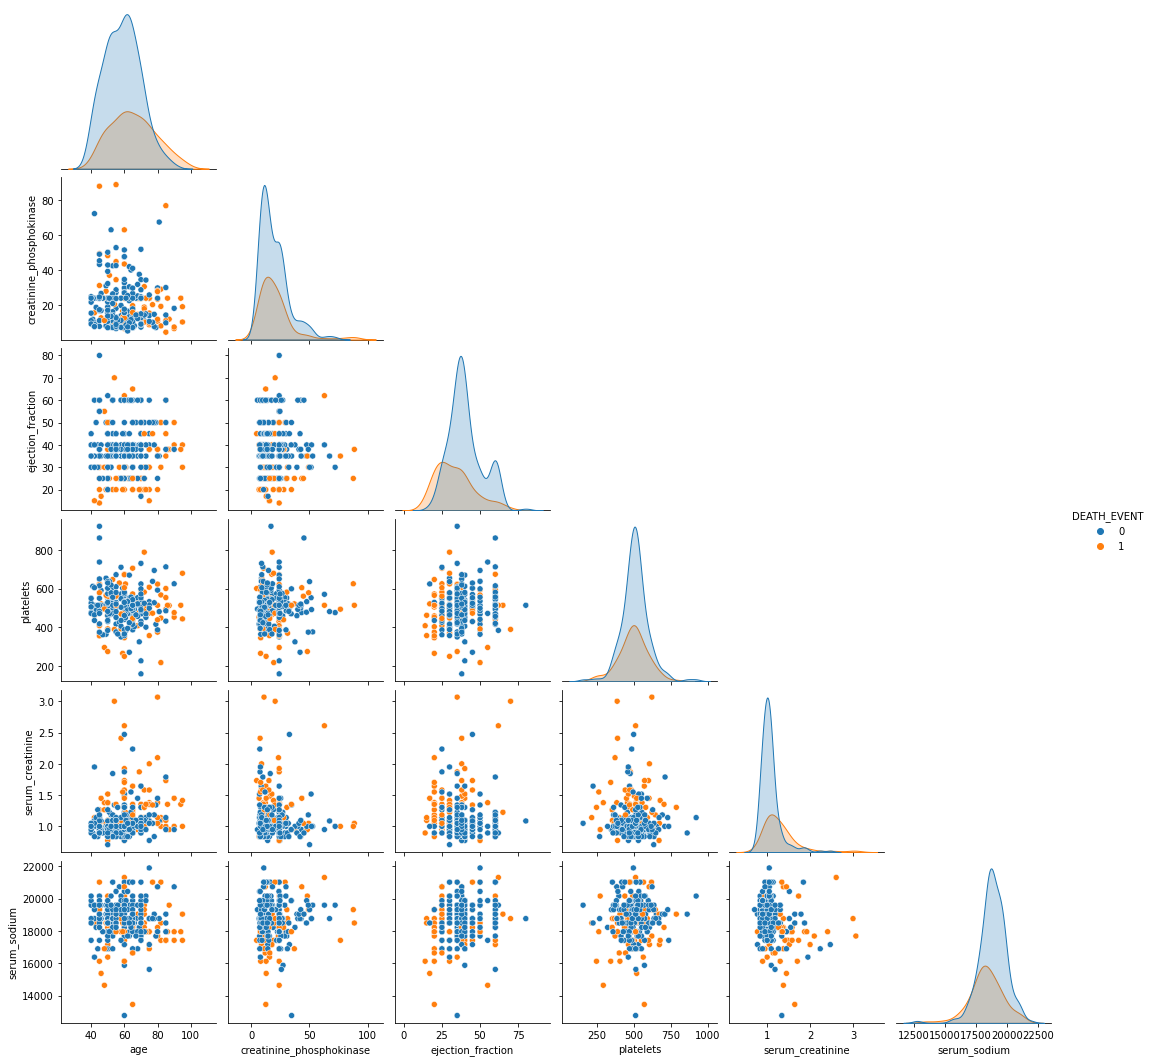

In [135]:
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']
sns.pairplot(data[cols], hue="DEATH_EVENT", corner=True)

* ზოგან მონაცემები წრესავით არის დაჯგუფებული (მაგ: platelets, serum_sodium), შესაბამისად დავამატებ x^2+y^y feature-ს.
* ზოგან პარაბოლასავით მაგ(platelets, serum_creatinine), დავამატოთ x**2
* ზოგან ჰიპერბოლით
* დავამატოთ ასევე სინუსიც

არ გვეშინია ბევრი feature-ის დამატება, რადგან ვიყენებთ რეგულარიზაციას, შესაბამისად უმნიშვნელო ფიჩერებს მინიმალური თეტა კოეფიციენტი დაეწერება და პასუხზე გავლენას არ მოახდენენ.

In [136]:
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
cols2 = ['anaemia', 'high_blood_pressure']

for col in cols:
    data[col + '**2'] = data[col]**2
    data['1/'+col] = 1/(data[col]+1)
    data['sin'+col] = np.sin(data[col])
    data['log'+col] = np.log(data[col]+1)
    
for col1 in cols:
    for col2 in cols:
        if col1 > col2:
            data[col1+'*'+col2] = data[col1]*data[col2]
            data[col1+'**2+'+col2+'**2'] = data[col1]**2 + data[col2]**2
        if col1 != col2:
            data[col1+'/'+col2] = data[col1]/data[col2]
    for col2 in cols2:
        data[col1+col2] = data[col1]*data[col2]
#         data[col1+"!"+col2] = data[col1]*(1-data[col2])

In [137]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_sodium**2+ejection_fraction**2,serum_sodium/ejection_fraction,serum_sodium*platelets,serum_sodium**2+platelets**2,serum_sodium/platelets,serum_sodium*serum_creatinine,serum_sodium**2+serum_creatinine**2,serum_sodium/serum_creatinine,serum_sodiumanaemia,serum_sodiumhigh_blood_pressure
0,75.0,0,24.124676,0,20,1,514.781507,1.378405,16900,1,...,285610400,845.000000,8.699807e+06,2.858750e+08,32.829462,23295.042391,285610001.9,12260.548627,0,16900
1,55.0,0,88.662281,0,38,0,513.184207,1.048809,18496,1,...,342103460,486.736842,9.491855e+06,3.423654e+08,36.041639,19398.768456,342102017.1,17635.244051,0,0
2,65.0,0,12.083046,0,20,0,402.492236,1.140175,16641,1,...,276923281,832.050000,6.697873e+06,2.770849e+08,41.344897,18973.659249,276922882.3,14595.122499,0,0
3,50.0,1,10.535654,0,20,0,458.257569,1.378405,18769,1,...,352275761,938.450000,8.601036e+06,3.524854e+08,40.957316,25871.281103,352275362.9,13616.463738,18769,0
4,65.0,1,12.649111,1,20,0,571.839138,1.643168,13456,0,...,181064336,672.800000,7.694667e+06,1.813909e+08,23.531093,22110.464201,181063938.7,8189.060815,13456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,7.810250,1,38,1,393.700394,1.048809,20449,1,...,418163045,538.131579,8.050779e+06,4.183166e+08,51.940512,21447.092136,418161602.1,19497.356487,0,20449
295,55.0,0,42.661458,0,38,0,519.615242,1.095445,19321,0,...,373302485,508.447368,1.003949e+07,3.735710e+08,37.183282,21165.095067,373301042.2,17637.579223,0,0
296,45.0,0,45.387223,1,60,0,861.394219,0.894427,19044,0,...,362677536,317.400000,1.640439e+07,3.634159e+08,22.108344,17033.471425,362673936.8,21291.839282,0,0
297,45.0,0,49.122296,0,38,0,374.165739,1.183216,19600,1,...,384161444,515.789474,7.333648e+06,3.843000e+08,52.383203,23191.032750,384160001.4,16565.023393,0,0


მოვამზადოთ data დასამუშავებლად:

In [138]:
Xtrain, ytrain, Xdev, ydev, Xtest, ytest = prepare(data)

In [139]:
pd.DataFrame(Xtrain).describe()

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
count,179.0,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,...,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,1.0,-1.984756e-17,-4.465702e-17,-1.438948e-16,-2.977134e-17,-1.091616e-16,4.961891e-18,3.175610e-16,2.977134e-16,-9.526830e-16,...,-6.251982e-16,9.923781e-17,2.307279e-16,1.002302e-15,1.736662e-16,-2.381707e-16,4.664177e-16,-1.190854e-16,-9.923781e-18,3.473323e-17
std,0.0,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,...,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,1.0,-1.762454e+00,-9.616294e-01,-1.038140e+00,-8.108066e-01,-1.897603e+00,-8.298670e-01,-3.227335e+00,-1.147352e+00,-4.451811e+00,...,-3.938095e+00,-1.603196e+00,-3.006690e+00,-3.936128e+00,-2.030207e+00,-1.365257e+00,-3.938082e+00,-2.936834e+00,-9.574004e-01,-8.272924e-01
25%,1.0,-8.159341e-01,-9.616294e-01,-6.413135e-01,-8.108066e-01,-6.508180e-01,-8.298670e-01,-4.906761e-01,-6.298946e-01,-6.176908e-01,...,-6.498905e-01,-7.420455e-01,-4.921817e-01,-6.497937e-01,-5.061635e-01,-5.226632e-01,-6.498972e-01,-5.829772e-01,-9.574004e-01,-8.272924e-01
50%,1.0,-1.986382e-01,-9.616294e-01,-3.187620e-01,-8.108066e-01,-2.742578e-02,-8.298670e-01,8.696508e-02,-3.322799e-01,7.500691e-02,...,4.463821e-02,-2.320037e-01,-5.583661e-02,4.417632e-02,-1.721748e-01,-2.184354e-01,4.464793e-02,1.397620e-01,-9.574004e-01,-8.272924e-01
75%,1.0,6.244229e-01,1.039902e+00,2.818623e-01,1.233340e+00,5.180424e-01,1.205012e+00,5.204735e-01,2.503704e-01,5.453257e-01,...,5.337738e-01,4.792422e-01,4.709224e-01,5.369898e-01,3.323130e-01,2.340991e-01,5.337485e-01,6.952997e-01,1.041402e+00,1.177511e+00
max,1.0,2.682076e+00,1.039902e+00,4.689253e+00,1.233340e+00,3.245384e+00,1.205012e+00,4.693342e+00,5.663478e+00,2.245119e+00,...,2.419664e+00,3.626788e+00,5.093077e+00,2.419380e+00,5.800603e+00,5.594909e+00,2.419623e+00,1.940945e+00,1.281655e+00,1.451632e+00


შემოვიღოთ lambda პარამეტრი (lambdaPar), learningRate (alpha) და იტერაციების რაოდენობა (iters), რამდენჯერაც განვაახლებთ თეტებს გრადიენტის მიხედვით

In [140]:
lambdaPar = 1
alpha = 0.01
iters = 10000

In [141]:
theta = np.zeros(Xtrain.shape[1])

In [142]:
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

ვნახოთ რა არის საწყისი cost

In [143]:
computeCost(theta, Xtrain, ytrain, lambdaPar)

0.6931471605599454

გავუშვით მოდელის დამდგენი ალგორითმი

In [144]:
theta, cost = computeGradient(theta, Xtrain, ytrain, iters, alpha, lambdaPar)

ვნახეთ როგორი სიზუსტით მოგვცა პასუხი ჩვენს სამ set-ზე

In [145]:
getAccuracy(theta, Xtrain, ytrain)

0.8379888268156425

In [146]:
getAccuracy(theta, Xdev, ydev)

0.7288135593220338

In [147]:
getAccuracy(theta, Xtest, ytest)

0.8360655737704918

---

__ახლა ავარჩიოთ კარგი ალფა და ლამბდა პარამეტრები მოცემული მოდელისთვის:__

disclaimer: prepare ფუნქციაში ყოველ გაშვებაზე რანდომდება training, development და test სეტები, შესაბამისად ყოველ ახალ გაშვებაზე ახალი თრეინინგის მიხედვით სწავლობს მოდელი თავის პარამეტრეს და არჩეულ ლამდა თუ თეტა პარამეტრებში მცირედი განსხვავება მოსალოდნელია, თუმცა კატასტროფული სხვაობა არ უნდა იყოს

ვახდენთ development set-ის შედეგის მაქსიმიზაციას

In [148]:
alphas = [3, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001]
bestAlpha = alphas[0]
best = -1

In [149]:
for alpha in alphas:
    theta = np.zeros(Xtrain.shape[1])
    theta, cost = computeGradient(theta, Xtrain, ytrain, iters, alpha, lambdaPar)
    trainAcc = getAccuracy(theta, Xtrain, ytrain)
    print('alpha: ', alpha, ', training accuracy: ', trainAcc)
    devAcc = getAccuracy(theta, Xdev, ydev)
    print('alpha: ', alpha, ', development accuracy: ', devAcc)
    if(devAcc > best):
        best = devAcc
        bestAlpha = alpha
    print()

alpha:  3 , training accuracy:  0.7430167597765364
alpha:  3 , development accuracy:  0.5423728813559322

alpha:  1 , training accuracy:  0.8044692737430168
alpha:  1 , development accuracy:  0.6610169491525424

alpha:  0.5 , training accuracy:  0.8379888268156425
alpha:  0.5 , development accuracy:  0.711864406779661

alpha:  0.1 , training accuracy:  0.8379888268156425
alpha:  0.1 , development accuracy:  0.711864406779661

alpha:  0.05 , training accuracy:  0.8379888268156425
alpha:  0.05 , development accuracy:  0.711864406779661

alpha:  0.01 , training accuracy:  0.8379888268156425
alpha:  0.01 , development accuracy:  0.7288135593220338

alpha:  0.001 , training accuracy:  0.7988826815642458
alpha:  0.001 , development accuracy:  0.7457627118644068

alpha:  0.0001 , training accuracy:  0.7430167597765364
alpha:  0.0001 , development accuracy:  0.6949152542372882



__საუკეთესო შედეგი მოგვცა bestAlpha-მ__

In [150]:
alpha = bestAlpha
alpha

0.001

In [151]:
lambdas = [100, 15, 10, 8, 5, 1, 0.1, 0.001]
bestLambda = lambdas[0]
best = -1

In [152]:
for lambdaPar in lambdas:
    theta = np.zeros(Xtrain.shape[1])
    theta, cost = computeGradient(theta, Xtrain, ytrain, iters, alpha, lambdaPar)
    print('lambda: ', lambdaPar, ', training accuracy: ', getAccuracy(theta, Xtrain, ytrain))
    devAcc = getAccuracy(theta, Xdev, ydev)
    print('lambda: ', lambdaPar, ', development accuracy: ', devAcc)
    if(devAcc > best):
        best = devAcc
        bestLambda = lambdaPar
    print()

lambda:  100 , training accuracy:  0.7541899441340782
lambda:  100 , development accuracy:  0.7288135593220338

lambda:  15 , training accuracy:  0.7877094972067039
lambda:  15 , development accuracy:  0.7457627118644068

lambda:  10 , training accuracy:  0.7877094972067039
lambda:  10 , development accuracy:  0.7457627118644068

lambda:  8 , training accuracy:  0.7932960893854749
lambda:  8 , development accuracy:  0.7627118644067796

lambda:  5 , training accuracy:  0.7932960893854749
lambda:  5 , development accuracy:  0.7627118644067796

lambda:  1 , training accuracy:  0.7988826815642458
lambda:  1 , development accuracy:  0.7457627118644068

lambda:  0.1 , training accuracy:  0.7988826815642458
lambda:  0.1 , development accuracy:  0.7457627118644068

lambda:  0.001 , training accuracy:  0.7988826815642458
lambda:  0.001 , development accuracy:  0.7457627118644068



__საუკეთესო შედეგი მოგვცა bestLambda-მ__

In [153]:
lambdaPar = bestLambda
lambdaPar

8

In [154]:
theta = np.zeros(Xtrain.shape[1])
theta, cost = computeGradient(theta, Xtrain, ytrain, iters, alpha, lambdaPar)
print('theta: ', theta)
print('cost: ', cost)

theta:  [[-0.19650537  0.05684238  0.00735514 -0.01551343  0.14553876 -0.02682808
   0.02238983  0.00994696  0.04350242 -0.04132009 -0.18809046  0.03079324
   0.10510597  0.03541281  0.08685947  0.00913194  0.07057678 -0.00042742
  -0.31321824 -0.04011711  0.03392109  0.17606255  0.06386141 -0.10049906
   0.0417476   0.11881649 -0.00091702 -0.04690627  0.02625251 -0.06698642
   0.08454009  0.05512782 -0.02596412  0.07206857 -0.01932212 -0.0568252
   0.07416658  0.16228544  0.10491641 -0.00679986  0.06513695  0.01589142
   0.0281689  -0.08695338  0.13186724  0.06883289  0.04193009  0.03129759
  -0.01756644 -0.02637711  0.01853057  0.09009976  0.02542072  0.10360613
  -0.03477086  0.00197287  0.07734298 -0.0701882   0.04415503 -0.07648977
  -0.01513808  0.0103639  -0.06315671  0.05941387  0.0435286   0.01292195
  -0.00767455  0.04259515 -0.00684658 -0.01953274  0.04211458  0.17157187
  -0.00840741  0.01981183 -0.01571506  0.0759652   0.04438551  0.10511079
   0.0789908  -0.01079694  0.07

ჩვენი მოდელის საბოლოო შემფასებლად უნდა დავტოვოთ ტესტ სეტზე მიღებული სიზუსტე.

disclaimer: მონაცემების სიმცირის გამო რანდომ განაწილება მაინც საკმაოდ ცვლის პასუხებს (მაგალითად შეიძლება მივიღოთ დეველოპმენტ სეტზე დაბალი სიზუტე, ტესტზე კი მაღალი 20%-ის სხვაობითაც კი)

In [155]:
getAccuracy(theta, Xtest, ytest)

0.819672131147541

მივიღეთ test accuracy, რომელიც საკმაოდ კარგია (ჩემი აზრით), თუმცა time ცვლადით 95%-ზე ადიოდა, რადგან თითქმის პირდაპირ წინასწარმეტყველებდა მომავალს.